<h1>Fake News Classification using Website Data </h1>

<h1>1. Introduction: Imports and data pre-procssing</h1>

In [3]:
import json
import csv
from collections.abc import Sequence
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib.pyplot import imshow, show
import matplotlib.image as mpimg
import sklearn
from sklearn import metrics
import numpy as np
import pandas as pd
import shutil
import os
from PIL import Image
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding

In [4]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

In [5]:
polireal = "./noTweets/politifact/real/"
polifake = "./noTweets/politifact/fake/"
gossipreal = "./noTweets/gossipcop/real/"
gossipfake = "./noTweets/gossipcop/fake/"

In [6]:
df0 = pd.DataFrame() # Contains politifact real news sources
df0 = pd.DataFrame(columns = ['value'])

df1 = pd.DataFrame() # Contains politifact fake news sources
df1 = pd.DataFrame(columns = ['value'])

In [7]:
for filename in os.listdir(polireal):
    for filename2 in os.listdir(polireal + filename):
        if(filename2 != "tweets"):
            with open(polireal + filename + '/' + filename2) as json_file:
                data = json.load(json_file)
                df0 = df0.append(pd.json_normalize(data))
                df0['value'] = 1

for filename in os.listdir(polifake):
    for filename2 in os.listdir(polifake + filename):
        if(filename2 != "tweets"):
            with open(polifake + filename + '/' + filename2) as json_file:
                data = json.load(json_file)
                df1 = df1.append(pd.json_normalize(data))
                df1['value'] = 0            

In [8]:
df2 = pd.DataFrame() # Contains gossipcop real news sources
df2 = pd.DataFrame(columns = ['value'])

df3 = pd.DataFrame() # Contains politifact fake news sources
df3 = pd.DataFrame(columns = ['value'])

In [9]:
for filename in os.listdir(gossipreal):
    for filename2 in os.listdir(gossipreal + filename):
        if(filename2 != "tweets"):
            with open(gossipreal + filename + '/' + filename2) as json_file:
                data = json.load(json_file)
                df2 = df2.append(pd.json_normalize(data))
                df2['value'] = 1

for filename in os.listdir(gossipfake):
    for filename2 in os.listdir(gossipfake + filename):
        if(filename2 != "tweets"):
            with open(gossipfake + filename + '/' + filename2) as json_file:
                data = json.load(json_file)
                df3 = df3.append(pd.json_normalize(data))
                df3['value'] = 0      

In [10]:
df0

,value,url,text,images,top_img,keywords,authors,canonical_link,title,movies,...,meta_data.URL,meta_data.datePublished,meta_data.dateModified,meta_data.og.email,meta_data.revisit,meta_data.document-state,meta_data.category,meta_data.vertical,meta_data.DESCRIPTION,meta_data.contact
0,1,http://www.senate.gov/legislative/LIS/roll_cal...,Roll Call Vote 111th Congress - 1st Session\n\...,[http://www.senate.gov/resources/graphic/horiz...,http://www.senate.gov/resources/images/us_sen.ico,[],[],,U.S. Senate: U.S. Senate Roll Call Votes 111th...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,http://www.politico.com/news/stories/0509/2241...,Barack Obama ended up in the middle of an unli...,"[data:image/gif;base64,R0lGODlhAQABAAAAACH5BAE...",http://s3-origin-images.politico.com/news/0905...,[],[Alexander Burns],https://www.politico.com/story/2009/05/trump-o...,Trump on Prejean: Same as Obama,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,https://web.archive.org/web/20130515031205/htt...,The Wayback Machine requires your browser to s...,[https://web.archive.org/_static/images/archiv...,https://web.archive.org/_static/images/archive...,[],[],,Wayback Machine,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,http://pollingreport.com/CongJob.htm,Follow @pollreport CONGRESS – Job Rating See a...,[http://pollingreport.com/images/logo3.gif],,[],[],,Congress: Job Ratings,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,https://web.archive.org/web/20090514023215/htt...,House GOP Introduces Keep Terrorists Out of Am...,[https://web.archive.org/web/20090514023215im_...,https://web.archive.org/web/20090514023215im_/...,[],[],,House GOP Introduces Keep Terrorists Out of Am...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,http://www.nytimes.com/2008/09/21/business/21c...,WASHINGTON  The Bush administration on Saturd...,[https://static01.nyt.com/newsgraphics/images/...,https://static01.nyt.com/newsgraphics/images/i...,[],[David M. Herszenhorn],https://www.nytimes.com/2008/09/21/business/21...,Administration Is Seeking $700 Billion for Wal...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,http://www.msnbc.msn.com/id/3080247/,You are using an older browser version. Please...,[http://img-s-msn-com.akamaized.net/tenant/amp...,http://static-global-s-msn-com.akamaized.net/i...,[],[],http://www.msn.com/,"Outlook, Office, Skype, Bing, Breaking News, a...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,http://www.defenselink.mil/pubs/pdfs/Measuring...,Some 9 million Americans wore the nation's uni...,[https://media.defense.gov/2021/Mar/29/2002610...,https://media.defense.gov/2018/Oct/02/20020476...,[],[],https://www.defense.gov/,U.S. Department of Defense,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Department of Defense is America's largest...,pubwebhd@defense.gov
0,1,https://web.archive.org/web/20090425195727/htt...,Debt Day: A Symbol of Washington’s Arrogant Cu...,[https://web.archive.org/web/20090425195727im_...,https://web.archive.org/web/20090425195727im_/...,[],[],,Debt Day: A Symbol of Washington’s Arrogant Cu...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df1

,value,url,text,images,top_img,keywords,authors,canonical_link,title,movies,...,meta_data.pubexchange.image,meta_data.tp.EnableExternalController,meta_data.Title,meta_data.Description,meta_data.msapplication-navbutton-color,meta_data.specificfeeds-verification-code-VEFtZ0RzWUxPZXFQaGpIbG5Ud1c4S0JZY1BQbGc0bDFBandlckNKemhJa0k3WmdubFhHb2wzTml5eU9BRE4rUzNHV2NUU0pNVUs3RFlTcDJrZUpOVU90cVlqV3B2d1Z3Vy9IOFNkODJETHJ5amNGQVhFcHhKTjJKSFcxa0RTRFh8Qi9tTWdSRENNR3NyMjlvS2NMSDVOR3A3MUZJdkFUSDFnUjVGK3huNW5rQT0=,meta_data.specificfeeds-verification-code-T3lTc2V1M0pWZkoyZVJBc05FVVdLaENrT1BCbnZQa21OYUJXMnpSMTJmcmdUQ1FFTkg4N3BSY0l1M3lxbXZFNmZDTW5zNDlQU1o1RldESTlBUjR2MnBId1JOTVpUSzNlNTVteWlTUWRNU0NHc0dWTUZFNFQveVRvdUl2T292ZEx8aHFyQlZ5UndrZk1DL25wa21UTHpXQ0FJZW9jMVRSOFVndTNyb2N1ckRZMD0=,meta_data.BridPlugin,meta_data.alexaVerifyID,meta_data.og.pubdate
0,0,http://www.occupydemocrats.com/virginia-republ...,Sponsored Links\n\nRepublican attacks on trans...,"[data:image/svg+xml,%3Csvg%20xmlns='http://www...",https://occupydemocrats.com/wp-content/uploads...,[],[Colin Taylor],https://occupydemocrats.com/2016/01/12/virgini...,Virginia Republican Wants Schools To Check Chi...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,https://www.facebook.com/OccupyDemocrats/photo...,,[https://static.xx.fbcdn.net/rsrc.php/yD/r/d4Z...,https://static.xx.fbcdn.net/rsrc.php/yD/r/d4ZI...,[],[],,Facebook,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,https://web.archive.org/web/20160312003401/htt...,Mental Images\n\n“My pictures ask where does t...,[https://web.archive.org/web/20160311224304im_...,https://web.archive.org/web/20160311224304im_/...,[],[],https://web.archive.org/web/20160311224304/htt...,Mental Images,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,http://www.bbc.com/news/election-us-2016-37987...,But it appears not all Mr Zuckerberg's own emp...,[https://ichef.bbci.co.uk/news/385/cpsprodpb/1...,https://ichef.bbci.co.uk/news/1024/branded_new...,[],[],https://www.bbc.com/news/election-us-2016-3798...,Denzel Washington hit by Facebook fake news st...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,genius.com/discussions/219349-Donald-trump-pro...,Genius Nickname\n\nEmail\n\nPassword\n\nBy cli...,[https://trc.taboola.com/1301520/log/3/unip?en...,https://assets.genius.com/favicon.ico?1617216374,[],[],,Song Lyrics & Knowledge,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,http://www.neonnettle.com/news/4514-british-po...,British Politician Beaten by Protestors for 'W...,[http://www.neonnettle.com/news/images/Bide--t...,https://neonnettle.com/news/images/british-pol...,[],[Jay Greenberg],https://neonnettle.com/news/4514-british-polit...,British Politician Beaten by Protestors for 'W...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,https://yournewswire.com/puerto-rico-mayor-fra...,"Miguel G. Ortiz-Vélez, a Democrat-alligned Pue...",[https://cdn.newspunch.com/wp-content/uploads/...,https://cdn.newspunch.com/wp-content/uploads/2...,[],[Baxter Dmitry],https://newspunch.com/puerto-rico-mayor-fraud-...,Puerto Rico Mayor Facing Fraud Charges Over Mi...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,http://maga2020.us/news/clint-eastwood-leaves-...,For full functionality of this site it is nece...,"[data:image/x-icon;,]","data:image/x-icon;,",[],[],,,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,https://madworldnews.com/hillary-dead-body-hum...,(This post may contain disputed claims. We mak...,[https://madworldnews.com/wp-content/uploads/2...,https://madworldnews.com/wp-content/uploads/20...,[],"[About That Conservative Girl, Opinion Columni...",https://madworldnews.com/hillary-dead-body-hum...,Hillary Silent As Police Discover Dead Body Hi...,[https://www.youtube.com/embed/_52MQfauMeE?fea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df2

,value,url,text,images,top_img,keywords,authors,canonical_link,title,movies,...,meta_data.app-env,meta_data.app-platform,meta_data.app-revision,meta_data.bugsnag-api-key,meta_data.og.ttl,meta_data.published-date,meta_data.ii-ab-test.commerce-affiliatizer,meta_data.Katie Holmes and Tom Cruise were together for almost a decade — here's a timeline of their relationship,meta_data.cXenseParse.wsj-newsletter-inset,meta_data.Content-Type
0,1,https://www.townandcountrymag.com/society/poli...,Late 2016\n\nJames proposed to Pippa at the La...,[https://hips.hearstapps.com/hmg-prod.s3.amazo...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,[],[Corynne Cirilli],https://www.townandcountrymag.com/society/poli...,A Timeline of Pippa Middleton and James Matthe...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,https://www.cosmopolitan.com/lifestyle/g198549...,Princess Margaret and Peter Townsend’s affair\...,[https://hips.hearstapps.com/hmg-prod.s3.amazo...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,[],[Gregory E. Miller],https://www.cosmopolitan.com/lifestyle/g198549...,The 30 Biggest Royal Family Scandals of All Time,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,https://www.cnn.com/2016/09/12/entertainment/r...,"RIO DE JANEIRO, BRAZIL - AUGUST 12: Ryan Locht...",[https://cdn.cnn.com/cnnnext/dam/assets/160817...,https://cdn.cnn.com/cnnnext/dam/assets/1401100...,[],"[Madison Park, Sandra Gonzalez]",https://www.cnn.com/2016/09/12/entertainment/r...,Ryan Lochte rushed by protesters during DWTS,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,https://www.travelandleisure.com/trip-ideas/di...,"You’re bound to expect frightening drops, chao...","[data:image/svg+xml,%3Csvg%20xmlns='http://www...",https://imagesvc.meredithcorp.io/v3/mm/image?q...,[],[Carlye Wisel],https://www.travelandleisure.com/trip-ideas/di...,25 Easter Eggs You'll Want to Find Inside Disn...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,https://web.archive.org/web/20160805083656/htt...,Hollywood’s Creation of the “Catfight”\n\nHave...,[https://web.archive.org/web/20160805083656im_...,https://web.archive.org/web/20160805083656im_/...,[],[Laura Doherty],https://web.archive.org/web/20160805083656/htt...,Hollywood’s Creation of the “Catfight”,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,https://theworldnews.net/us-news/thomas-markle...,Thomas also expressed concern that he wouldn't...,"[https://theworldnews.net/ui/images/paper.svg,...",https://theworldnews.net/ogimage.png,[],[],,Thomas Markle Accuses Meghan Markle and Royal ...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,https://www.radiotimes.com/news/on-demand/2018...,Netflix’s Stranger Things season three was a d...,[https://images.immediate.co.uk/production/vol...,https://images.immediate.co.uk/production/vola...,[],[Ben Allen],https://www.radiotimes.com/tv/sci-fi/stranger-...,When is Stranger Things 3 on Netflix? Who is i...,[https://www.youtube.com/embed/4XdZ1GGobpo?fea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,https://www.bustle.com/p/chris-harrison-is-roo...,There have been plenty of matches made on Bach...,[https://imgix.bustle.com/uploads/image/2018/7...,https://imgix.bustle.com/uploads/image/2018/7/...,[],[],https://www.bustle.com/p/chris-harrison-is-roo...,Chris Harrison Is Rooting For Sarah Hyland & W...,[https://www.youtube.com/embed/Xr31xUBNcuw],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,https://www.today.com/popculture/keith-urban-o...,Keith Urban is offering heartfelt advice to De...,[https://media4.s-nbcnews.com/j/MSNBC/Componen...,https://media4.s-nbcnews.com/j/newscms/2018_31...,[],[],https://www.today.com/popculture/keith-urban-o...,Keith Urban offers heartfelt advice to Demi Lo...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df3

,value,url,text,images,top_img,keywords,authors,canonical_link,title,movies,...,meta_data.authorList,meta_data.master-uuid,meta_data.og.determiner,meta_data.og.rich_attachment,meta_data.article.tags,meta_data.lytics.topics,meta_data.lytics.author,meta_data.fb.use_automatic_ad_placement,meta_data.st.robots,meta_data.dcterms.language
0,0,https://web.archive.org/web/20130515031205/htt...,The Wayback Machine requires your browser to s...,[https://web.archive.org/_static/images/archiv...,https://web.archive.org/_static/images/archive...,[],[],,Wayback Machine,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,parade.com/95478/parade/jessica-simpson-heartb...,"\n\nJessica Simpson‘s beloved dog, Daisy, was ...","[data:image/svg+xml;base64,PHN2ZyB3aWR0aD0iNDg...",http://parade.com/wp-content/themes/wp-theme/i...,[],[],https://parade.com/95478/parade/jessica-simpso...,Jessica Simpson Heartbroken Over Missing Dog,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,www.wmagazine.com/story/kanye-west-reportedly-...,After years of rapping about food (most famous...,[https://imgix.bustle.com/wmag/2018/07/18/5b4f...,https://imgix.bustle.com/wmag/2018/07/18/5b4fb...,[],[],https://www.wmagazine.com/story/kanye-west-rep...,Kanye West Is Reportedly Opening a Restaurant ...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,www.thecut.com/2018/08/brad-pitt-angelina-joli...,Brad Pitt and Angelina Jolie. Photo: Getty Ima...,[https://pyxis.nymag.com/v1/imgs/d14/eb7/6c103...,https://pyxis.nymag.com/v1/imgs/0d5/dd1/255d81...,[],[Lisa Ryan],https://www.thecut.com/2019/04/brad-pitt-angel...,What’s Going on With Brad Pitt and Angelina Jo...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,www.celebuzz.com/2017-03-04/is-kanye-west-head...,It’s that time of the week again when the cele...,[http://pixel.quantserve.com/pixel/p-bDyt5XZ5y...,https://www.celebuzz.com/wp-content/uploads/20...,[],[],https://www.celebuzz.com/2017-03-04/is-kanye-w...,Is Kanye West Heading to Rehab?,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,https://web.archive.org/web/20130515031205/htt...,The Wayback Machine requires your browser to s...,[https://web.archive.org/_static/images/archiv...,https://web.archive.org/_static/images/archive...,[],[],,Wayback Machine,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,www.the-magician.co.uk/harry-potter-london-loc...,THE FINAL PART OF YOUR HARRY POTTER JOURNEY\n\...,[http://www.the-magician.co.uk/images/st-pancr...,http://www.the-magician.co.uk/images/st-pancra...,[],[Richard Jones],https://www.the-magician.co.uk/harry-potter-lo...,"Platform Nine-And-Three-Quarters, King's Cross...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,www.theguardian.com/us-news/2017/mar/04/donald...,Donald Trump has accused Barack Obama of “wire...,[https://sb.scorecardresearch.com/p?c1=2&c2=60...,https://i.guim.co.uk/img/media/724f9fd007cd171...,[],[Chris Johnston],http://www.theguardian.com/us-news/2017/mar/04...,'This is McCarthyism!': Trump accuses Obama of...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,hollywoodlife.com/2017/12/27/kendall-jenner-wo...,"Just like Kylie, it looks like Kendall Jenner ...",[https://www.blogher.com/wp-content/uploads/20...,https://hollywoodlife.com/wp-content/uploads/2...,[],"[Robyn Merrett, Scarlett Harris, Jenzia Burgos...",https://hollywoodlife.com/2017/12/27/kendall-j...,Kendall Jenner Alone On NYE: Why Blake Griffin...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dfReal0 = df0.append(df1)
dfReal0 = dfReal0.reset_index(drop=True)
dfReal0 = dfReal0.dropna(axis=1)

In [15]:
dfReal1 = df2.append(df3)
dfReal1 = dfReal1.reset_index(drop=True)
dfReal1 = dfReal1.dropna(axis=1)

In [16]:
dfReal0

,value,url,text,images,top_img,keywords,authors,canonical_link,title,movies,source,summary
0,1,http://www.senate.gov/legislative/LIS/roll_cal...,Roll Call Vote 111th Congress - 1st Session\n\...,[http://www.senate.gov/resources/graphic/horiz...,http://www.senate.gov/resources/images/us_sen.ico,[],[],,U.S. Senate: U.S. Senate Roll Call Votes 111th...,[],http://www.senate.gov,
1,1,http://www.politico.com/news/stories/0509/2241...,Barack Obama ended up in the middle of an unli...,"[data:image/gif;base64,R0lGODlhAQABAAAAACH5BAE...",http://s3-origin-images.politico.com/news/0905...,[],[Alexander Burns],https://www.politico.com/story/2009/05/trump-o...,Trump on Prejean: Same as Obama,[],http://www.politico.com,
2,1,https://web.archive.org/web/20130515031205/htt...,The Wayback Machine requires your browser to s...,[https://web.archive.org/_static/images/archiv...,https://web.archive.org/_static/images/archive...,[],[],,Wayback Machine,[],https://web.archive.org,
3,1,http://pollingreport.com/CongJob.htm,Follow @pollreport CONGRESS – Job Rating See a...,[http://pollingreport.com/images/logo3.gif],,[],[],,Congress: Job Ratings,[],http://pollingreport.com,
4,1,https://web.archive.org/web/20090514023215/htt...,House GOP Introduces Keep Terrorists Out of Am...,[https://web.archive.org/web/20090514023215im_...,https://web.archive.org/web/20090514023215im_/...,[],[],,House GOP Introduces Keep Terrorists Out of Am...,[],https://web.archive.org,
...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0,http://www.neonnettle.com/news/4514-british-po...,British Politician Beaten by Protestors for 'W...,[http://www.neonnettle.com/news/images/Bide--t...,https://neonnettle.com/news/images/british-pol...,[],[Jay Greenberg],https://neonnettle.com/news/4514-british-polit...,British Politician Beaten by Protestors for 'W...,[],http://www.neonnettle.com,
1018,0,https://yournewswire.com/puerto-rico-mayor-fra...,"Miguel G. Ortiz-Vélez, a Democrat-alligned Pue...",[https://cdn.newspunch.com/wp-content/uploads/...,https://cdn.newspunch.com/wp-content/uploads/2...,[],[Baxter Dmitry],https://newspunch.com/puerto-rico-mayor-fraud-...,Puerto Rico Mayor Facing Fraud Charges Over Mi...,[],https://yournewswire.com,
1019,0,http://maga2020.us/news/clint-eastwood-leaves-...,For full functionality of this site it is nece...,"[data:image/x-icon;,]","data:image/x-icon;,",[],[],,,[],http://maga2020.us,
1020,0,https://madworldnews.com/hillary-dead-body-hum...,(This post may contain disputed claims. We mak...,[https://madworldnews.com/wp-content/uploads/2...,https://madworldnews.com/wp-content/uploads/20...,[],"[About That Conservative Girl, Opinion Columni...",https://madworldnews.com/hillary-dead-body-hum...,Hillary Silent As Police Discover Dead Body Hi...,[https://www.youtube.com/embed/_52MQfauMeE?fea...,https://madworldnews.com,


In [17]:
dfReal1

,value,url,text,images,top_img,keywords,authors,canonical_link,title,movies,source,summary
0,1,https://www.townandcountrymag.com/society/poli...,Late 2016\n\nJames proposed to Pippa at the La...,[https://hips.hearstapps.com/hmg-prod.s3.amazo...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,[],[Corynne Cirilli],https://www.townandcountrymag.com/society/poli...,A Timeline of Pippa Middleton and James Matthe...,[],https://www.townandcountrymag.com,
1,1,https://www.cosmopolitan.com/lifestyle/g198549...,Princess Margaret and Peter Townsend’s affair\...,[https://hips.hearstapps.com/hmg-prod.s3.amazo...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,[],[Gregory E. Miller],https://www.cosmopolitan.com/lifestyle/g198549...,The 30 Biggest Royal Family Scandals of All Time,[],https://www.cosmopolitan.com,
2,1,https://www.cnn.com/2016/09/12/entertainment/r...,"RIO DE JANEIRO, BRAZIL - AUGUST 12: Ryan Locht...",[https://cdn.cnn.com/cnnnext/dam/assets/160817...,https://cdn.cnn.com/cnnnext/dam/assets/1401100...,[],"[Madison Park, Sandra Gonzalez]",https://www.cnn.com/2016/09/12/entertainment/r...,Ryan Lochte rushed by protesters during DWTS,[],https://www.cnn.com,
3,1,https://www.travelandleisure.com/trip-ideas/di...,"You’re bound to expect frightening drops, chao...","[data:image/svg+xml,%3Csvg%20xmlns='http://www...",https://imagesvc.meredithcorp.io/v3/mm/image?q...,[],[Carlye Wisel],https://www.travelandleisure.com/trip-ideas/di...,25 Easter Eggs You'll Want to Find Inside Disn...,[],https://www.travelandleisure.com,
4,1,https://web.archive.org/web/20160805083656/htt...,Hollywood’s Creation of the “Catfight”\n\nHave...,[https://web.archive.org/web/20160805083656im_...,https://web.archive.org/web/20160805083656im_/...,[],[Laura Doherty],https://web.archive.org/web/20160805083656/htt...,Hollywood’s Creation of the “Catfight”,[],https://web.archive.org,
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0,https://web.archive.org/web/20130515031205/htt...,The Wayback Machine requires your browser to s...,[https://web.archive.org/_static/images/archiv...,https://web.archive.org/_static/images/archive...,[],[],,Wayback Machine,[],https://web.archive.org,
3194,0,www.the-magician.co.uk/harry-potter-london-loc...,THE FINAL PART OF YOUR HARRY POTTER JOURNEY\n\...,[http://www.the-magician.co.uk/images/st-pancr...,http://www.the-magician.co.uk/images/st-pancra...,[],[Richard Jones],https://www.the-magician.co.uk/harry-potter-lo...,"Platform Nine-And-Three-Quarters, King's Cross...",[],http://www.the-magician.co.uk,
3195,0,www.theguardian.com/us-news/2017/mar/04/donald...,Donald Trump has accused Barack Obama of “wire...,[https://sb.scorecardresearch.com/p?c1=2&c2=60...,https://i.guim.co.uk/img/media/724f9fd007cd171...,[],[Chris Johnston],http://www.theguardian.com/us-news/2017/mar/04...,'This is McCarthyism!': Trump accuses Obama of...,[],http://www.theguardian.com,
3196,0,hollywoodlife.com/2017/12/27/kendall-jenner-wo...,"Just like Kylie, it looks like Kendall Jenner ...",[https://www.blogher.com/wp-content/uploads/20...,https://hollywoodlife.com/wp-content/uploads/2...,[],"[Robyn Merrett, Scarlett Harris, Jenzia Burgos...",https://hollywoodlife.com/2017/12/27/kendall-j...,Kendall Jenner Alone On NYE: Why Blake Griffin...,[],http://hollywoodlife.com,


In [18]:
for x in range (len(dfReal0)):
    if "javascript" in dfReal0['text'][x].lower():
        dfReal0 = dfReal0.drop(index = x)
    elif "you are using an older browser" in dfReal0['text'][x].lower():
        dfReal0 = dfReal0.drop(index = x)

In [19]:
for x in range (len(dfReal1)):
    if "javascript" in dfReal1['text'][x].lower():
        dfReal1 = dfReal1.drop(index = x)
    elif "you are using an older browser" in dfReal1['text'][x].lower():
        dfReal1 = dfReal1.drop(index = x)

In [20]:
dfReal0 = dfReal0.reset_index(drop=True)
dfReal1 = dfReal1.reset_index(drop=True)

In [21]:
dfReal0

,value,url,text,images,top_img,keywords,authors,canonical_link,title,movies,source,summary
0,1,http://www.senate.gov/legislative/LIS/roll_cal...,Roll Call Vote 111th Congress - 1st Session\n\...,[http://www.senate.gov/resources/graphic/horiz...,http://www.senate.gov/resources/images/us_sen.ico,[],[],,U.S. Senate: U.S. Senate Roll Call Votes 111th...,[],http://www.senate.gov,
1,1,http://www.politico.com/news/stories/0509/2241...,Barack Obama ended up in the middle of an unli...,"[data:image/gif;base64,R0lGODlhAQABAAAAACH5BAE...",http://s3-origin-images.politico.com/news/0905...,[],[Alexander Burns],https://www.politico.com/story/2009/05/trump-o...,Trump on Prejean: Same as Obama,[],http://www.politico.com,
2,1,http://pollingreport.com/CongJob.htm,Follow @pollreport CONGRESS – Job Rating See a...,[http://pollingreport.com/images/logo3.gif],,[],[],,Congress: Job Ratings,[],http://pollingreport.com,
3,1,https://web.archive.org/web/20090514023215/htt...,House GOP Introduces Keep Terrorists Out of Am...,[https://web.archive.org/web/20090514023215im_...,https://web.archive.org/web/20090514023215im_/...,[],[],,House GOP Introduces Keep Terrorists Out of Am...,[],https://web.archive.org,
4,1,https://web.archive.org/web/20061116002411/htt...,'); //--> E-mail | Print | Comments | Request ...,[https://web.archive.org/web/20061116002411im_...,https://web.archive.org/web/20061116002411im_/...,[],[Robert Lenzner],,Is The End In Sight For Supermax?,[],https://web.archive.org,
...,...,...,...,...,...,...,...,...,...,...,...,...
926,0,https://thegoldwater.com/news/30915-Clinton-Bo...,Photo credit: infowars.com\n\nNew Jersey coupl...,[https://thegoldwater.com/static/public/icons/...,https://thegoldwater.com/static/media_thumb/7f...,[],[],https://thegoldwater.com/news/30915-Clinton-Bo...,Clinton Body Count Series #5: Woman Set to Tes...,[],https://thegoldwater.com,
927,0,http://www.neonnettle.com/news/4514-british-po...,British Politician Beaten by Protestors for 'W...,[http://www.neonnettle.com/news/images/Bide--t...,https://neonnettle.com/news/images/british-pol...,[],[Jay Greenberg],https://neonnettle.com/news/4514-british-polit...,British Politician Beaten by Protestors for 'W...,[],http://www.neonnettle.com,
928,0,https://yournewswire.com/puerto-rico-mayor-fra...,"Miguel G. Ortiz-Vélez, a Democrat-alligned Pue...",[https://cdn.newspunch.com/wp-content/uploads/...,https://cdn.newspunch.com/wp-content/uploads/2...,[],[Baxter Dmitry],https://newspunch.com/puerto-rico-mayor-fraud-...,Puerto Rico Mayor Facing Fraud Charges Over Mi...,[],https://yournewswire.com,
929,0,https://madworldnews.com/hillary-dead-body-hum...,(This post may contain disputed claims. We mak...,[https://madworldnews.com/wp-content/uploads/2...,https://madworldnews.com/wp-content/uploads/20...,[],"[About That Conservative Girl, Opinion Columni...",https://madworldnews.com/hillary-dead-body-hum...,Hillary Silent As Police Discover Dead Body Hi...,[https://www.youtube.com/embed/_52MQfauMeE?fea...,https://madworldnews.com,


In [22]:
dfReal1

,value,url,text,images,top_img,keywords,authors,canonical_link,title,movies,source,summary
0,1,https://www.townandcountrymag.com/society/poli...,Late 2016\n\nJames proposed to Pippa at the La...,[https://hips.hearstapps.com/hmg-prod.s3.amazo...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,[],[Corynne Cirilli],https://www.townandcountrymag.com/society/poli...,A Timeline of Pippa Middleton and James Matthe...,[],https://www.townandcountrymag.com,
1,1,https://www.cosmopolitan.com/lifestyle/g198549...,Princess Margaret and Peter Townsend’s affair\...,[https://hips.hearstapps.com/hmg-prod.s3.amazo...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,[],[Gregory E. Miller],https://www.cosmopolitan.com/lifestyle/g198549...,The 30 Biggest Royal Family Scandals of All Time,[],https://www.cosmopolitan.com,
2,1,https://www.cnn.com/2016/09/12/entertainment/r...,"RIO DE JANEIRO, BRAZIL - AUGUST 12: Ryan Locht...",[https://cdn.cnn.com/cnnnext/dam/assets/160817...,https://cdn.cnn.com/cnnnext/dam/assets/1401100...,[],"[Madison Park, Sandra Gonzalez]",https://www.cnn.com/2016/09/12/entertainment/r...,Ryan Lochte rushed by protesters during DWTS,[],https://www.cnn.com,
3,1,https://www.travelandleisure.com/trip-ideas/di...,"You’re bound to expect frightening drops, chao...","[data:image/svg+xml,%3Csvg%20xmlns='http://www...",https://imagesvc.meredithcorp.io/v3/mm/image?q...,[],[Carlye Wisel],https://www.travelandleisure.com/trip-ideas/di...,25 Easter Eggs You'll Want to Find Inside Disn...,[],https://www.travelandleisure.com,
4,1,https://web.archive.org/web/20160805083656/htt...,Hollywood’s Creation of the “Catfight”\n\nHave...,[https://web.archive.org/web/20160805083656im_...,https://web.archive.org/web/20160805083656im_/...,[],[Laura Doherty],https://web.archive.org/web/20160805083656/htt...,Hollywood’s Creation of the “Catfight”,[],https://web.archive.org,
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,0,www.intouchweekly.com/posts/sofia-richie-scott...,Shortly after it was revealed Lionel Richie wa...,[https://www.intouchweekly.com/wp-content/uplo...,https://www.intouchweekly.com/wp-content/uploa...,[],[Carly Sitzer],https://www.intouchweekly.com/posts/sofia-rich...,Sofia Richie and Scott Disick Prepare to Sign ...,[],http://www.intouchweekly.com,
3108,0,www.the-magician.co.uk/harry-potter-london-loc...,THE FINAL PART OF YOUR HARRY POTTER JOURNEY\n\...,[http://www.the-magician.co.uk/images/st-pancr...,http://www.the-magician.co.uk/images/st-pancra...,[],[Richard Jones],https://www.the-magician.co.uk/harry-potter-lo...,"Platform Nine-And-Three-Quarters, King's Cross...",[],http://www.the-magician.co.uk,
3109,0,www.theguardian.com/us-news/2017/mar/04/donald...,Donald Trump has accused Barack Obama of “wire...,[https://sb.scorecardresearch.com/p?c1=2&c2=60...,https://i.guim.co.uk/img/media/724f9fd007cd171...,[],[Chris Johnston],http://www.theguardian.com/us-news/2017/mar/04...,'This is McCarthyism!': Trump accuses Obama of...,[],http://www.theguardian.com,
3110,0,hollywoodlife.com/2017/12/27/kendall-jenner-wo...,"Just like Kylie, it looks like Kendall Jenner ...",[https://www.blogher.com/wp-content/uploads/20...,https://hollywoodlife.com/wp-content/uploads/2...,[],"[Robyn Merrett, Scarlett Harris, Jenzia Burgos...",https://hollywoodlife.com/2017/12/27/kendall-j...,Kendall Jenner Alone On NYE: Why Blake Griffin...,[],http://hollywoodlife.com,


In [23]:
dfLearn0 = dfReal0[['value', 'text', 'title']] # dfLearn0 contains a smaller amount of fake and real news from politifact
dfLearn1 = dfReal1[['value', 'text', 'title']] # dfLearn1 contains larger amount of fake and real news from gossipcop

In [24]:
dfLearn0 = dfLearn0.drop_duplicates()
dfLearn1 = dfLearn1.drop_duplicates()

In [25]:
dfLearn0 = dfLearn0.reset_index(drop=True)
dfLearn1 = dfLearn1.reset_index(drop=True)

In [26]:
dfLearn0

,value,text,title
0,1,Roll Call Vote 111th Congress - 1st Session\n\...,U.S. Senate: U.S. Senate Roll Call Votes 111th...
1,1,Barack Obama ended up in the middle of an unli...,Trump on Prejean: Same as Obama
2,1,Follow @pollreport CONGRESS – Job Rating See a...,Congress: Job Ratings
3,1,House GOP Introduces Keep Terrorists Out of Am...,House GOP Introduces Keep Terrorists Out of Am...
4,1,'); //--> E-mail | Print | Comments | Request ...,Is The End In Sight For Supermax?
...,...,...,...
817,0,Photo credit: infowars.com\n\nNew Jersey coupl...,Clinton Body Count Series #5: Woman Set to Tes...
818,0,British Politician Beaten by Protestors for 'W...,British Politician Beaten by Protestors for 'W...
819,0,"Miguel G. Ortiz-Vélez, a Democrat-alligned Pue...",Puerto Rico Mayor Facing Fraud Charges Over Mi...
820,0,(This post may contain disputed claims. We mak...,Hillary Silent As Police Discover Dead Body Hi...


In [27]:
#dfLearn.to_csv('fake_news.csv')

In [28]:
for i in range(len(dfLearn0)):
    dfLearn0['text'][i] = dfLearn0['text'][i].replace('\n', '')

C:\Users\Ryan\anaconda3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
for i in range(len(dfLearn1)):
    dfLearn1['text'][i] = dfLearn1['text'][i].replace('\n', '')

C:\Users\Ryan\anaconda3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
dfLearn0 = dfLearn0.reset_index(drop=True)
dfLearn1 = dfLearn1.reset_index(drop=True)

<h1> 2. Word embedding layer creation and train/test split </h1>

In [31]:
fcnnStats = pd.DataFrame()
fcnnStats = pd.DataFrame(columns = ['type','inputlength','activation','accuracy','dataset', 'f1-score'])

cnnStats = pd.DataFrame()
cnnStats = pd.DataFrame(columns = ['type','inputlength','activation','pool_size','accuracy', 'dataset', 'f1-score'])

In [32]:
def createEm(inputlength, numwords, df):
    input_length = inputlength
    num_words = numwords
    
    texts = df['text']
    labels = df['value']
    labels_index = df.index.values
    
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    
    word_index = tokenizer.word_index    
    data = pad_sequences(sequences, maxlen=input_length)
    
    result = [1]*7
    x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(data, labels, labels_index, test_size=0.33, random_state=42)
    
    result[0] = x_train
    result[1] = x_test
    result[2] = y_train
    result[3] = y_test
    result[4] = indices_train
    result[5] = indices_test
    embedding_layer = Embedding(len(word_index) + 1,
                            df['text'].shape[0],
                            input_length=input_length)
    
    result[6] = embedding_layer
    return result

In [33]:
activation = ['relu', 'sigmoid', 'tanh']

<h1>2.1 FCNN on politifact </h1>

In [34]:
for i in range(1, 4):
    ttsplit = createEm(250*i, 250, dfLearn0)

    x_train = ttsplit[0]
    x_test = ttsplit[1]

    y_train = tf.keras.utils.to_categorical(ttsplit[2])
    y_test = tf.keras.utils.to_categorical(ttsplit[3])
    
    for k in activation:
        model = Sequential()
        model.add(ttsplit[6])
        model.add(Dense(25, activation=k))
        model.add(Dense(25, activation=k))
        model.add(Flatten())
        model.add(Dense(2, activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                      optimizer='Adam',
                      metrics=['acc'])

        monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

        model.fit(x_train, y_train, validation_data=(x_test, y_test),
                  callbacks=[monitor],
                  epochs=50, batch_size=128)
        
        pred = model.predict(x_test)
        pred = np.argmax(pred,axis=1)
        y_true = np.argmax(y_test,axis=1)

        score = metrics.accuracy_score(y_true, pred)
        f1 = metrics.f1_score(y_true, pred, average='weighted')
        new_row = {'type':'fcnn', 'inputlength': 250*i, 'activation': k, 'accuracy': score, 'dataset': 'politifact', 'f1-score': f1}
        fcnnStats = fcnnStats.append(new_row, ignore_index=True)
        print("Final accuracy: {}".format(score))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 550 samples, validate on 272 samples
Epoch 1/50
550/550 [==============================] - 2s 4ms/sample - loss: 0.6905 - acc: 0.5000 - val_loss: 0.6674 - val_acc: 0.5919
Epoch 2/50
550/550 [==============================] - 2s 3ms/sample - loss: 0.6477 - acc: 0.6127 - val_loss: 0.6435 - val_acc: 0.6176
Epoch 3/50
550/550 [==============================] - 2s 3ms/sample - loss: 0.5983 - acc: 0.6436 - val_loss: 0.6318 - val_acc: 0.6324
Epoch 4/50
550/550 [==============================] - 2s 4ms/sample - loss: 0.5456 - acc: 0.6582 - val_loss: 0.6235 - val_acc: 0.6250
Epoch 5/50
550/550 [==============================] - 2s 4ms/sample - loss: 0.4876 - acc: 0.7164 - val_loss: 0.6169 - val_acc: 0.6654
Epoch 6/50
550/550 [============================

In [35]:
fcnnStats

,type,inputlength,activation,accuracy,dataset,f1-score
0,fcnn,250,relu,0.669118,politifact,0.664410
1,fcnn,250,sigmoid,0.569853,politifact,0.413711
2,fcnn,250,tanh,0.691176,politifact,0.691978
3,fcnn,500,relu,0.724265,politifact,0.724405
4,fcnn,500,sigmoid,0.430147,politifact,0.258752
5,fcnn,500,tanh,0.702206,politifact,0.701711
6,fcnn,750,relu,0.764706,politifact,0.762731
7,fcnn,750,sigmoid,0.661765,politifact,0.646223
8,fcnn,750,tanh,0.801471,politifact,0.802230


<h1> 2.2 CNN on politifact </h1>

In [36]:
for i in range(1, 4):
    ttsplit = createEm(250*i, 250, dfLearn0)

    x_train = ttsplit[0]
    x_test = ttsplit[1]

    y_train = tf.keras.utils.to_categorical(ttsplit[2])
    y_test = tf.keras.utils.to_categorical(ttsplit[3])
    
    for k in activation:
        for j in range(3, 5):         
            CNNmodel = Sequential()
            CNNmodel.add(ttsplit[6])
            CNNmodel.add(Conv1D(32, 3, padding='same',
                             input_shape=x_train.shape[1:]))
            CNNmodel.add(Activation(k))
            CNNmodel.add(MaxPooling1D(pool_size=j))
            CNNmodel.add(Conv1D(16, 3))
            CNNmodel.add(MaxPooling1D(pool_size=j))
            CNNmodel.add(Dropout(.5))
            CNNmodel.add(Flatten())
            CNNmodel.add(Dense(2, activation='softmax'))
            CNNmodel.compile(loss='categorical_crossentropy',
                          optimizer='Adam',
                          metrics=['acc'])
            CNNmodel.fit(x_train, y_train, validation_data=(x_test, y_test),
                         callbacks=[monitor],
                         epochs=50, batch_size=128)

            monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
            pred = CNNmodel.predict(x_test)
            pred = np.argmax(pred,axis=1)
            y_true = np.argmax(y_test,axis=1)

            score = metrics.accuracy_score(y_true, pred)
            f1 = metrics.f1_score(y_true, pred, average='weighted')
            new_row1 = {'type':'cnn', 'inputlength': 250*i, 'activation': k, 'pool_size': j, 'accuracy': score, 'dataset': 'politifact', 'f1-score': f1}
            cnnStats = cnnStats.append(new_row1, ignore_index=True)

Train on 550 samples, validate on 272 samples
Epoch 1/50
550/550 [==============================] - 4s 7ms/sample - loss: 0.6807 - acc: 0.5509 - val_loss: 0.6565 - val_acc: 0.6250
Epoch 2/50
550/550 [==============================] - 3s 6ms/sample - loss: 0.6353 - acc: 0.6709 - val_loss: 0.6419 - val_acc: 0.6176
Epoch 3/50
550/550 [==============================] - 4s 7ms/sample - loss: 0.6033 - acc: 0.6800 - val_loss: 0.6212 - val_acc: 0.6801
Epoch 4/50
550/550 [==============================] - 3s 6ms/sample - loss: 0.5670 - acc: 0.7000 - val_loss: 0.6159 - val_acc: 0.6654
Epoch 5/50
550/550 [==============================] - 3s 6ms/sample - loss: 0.5447 - acc: 0.7073 - val_loss: 0.6137 - val_acc: 0.6728
Epoch 6/50
550/550 [==============================] - 3s 6ms/sample - loss: 0.5064 - acc: 0.7436 - val_loss: 0.6072 - val_acc: 0.6691
Epoch 7/50
550/550 [==============================] - 4s 7ms/sample - loss: 0.4935 - acc: 0.7582 - val_loss: 0.6045 - val_acc: 0.6765
Epoch 8/50
550/5

In [38]:
cnnStats

,type,inputlength,activation,pool_size,accuracy,dataset,f1-score
0,cnn,250,relu,3,0.698529,politifact,0.697453
1,cnn,250,relu,4,0.805147,politifact,0.804294
2,cnn,250,sigmoid,3,0.786765,politifact,0.786976
3,cnn,250,sigmoid,4,0.783088,politifact,0.779276
4,cnn,250,tanh,3,0.779412,politifact,0.774732
5,cnn,250,tanh,4,0.772059,politifact,0.767223
6,cnn,500,relu,3,0.790441,politifact,0.790328
7,cnn,500,relu,4,0.786765,politifact,0.784975
8,cnn,500,sigmoid,3,0.801471,politifact,0.802123
9,cnn,500,sigmoid,4,0.797794,politifact,0.792707


<h2>There are two problems so far. One, we can only train on the smaller politifact set because it takes too long otherwise. With epochs around 50 seconds using the gossipcop set, it's unrealistic to train these models without a dedicated gpu. </h2>

<h2>The second problem is that it simply takes too long to train in general due to having to learn the weights for the embedding layer. We can solve both of these problems by using pretrained word embedding weights.</h2>

In [38]:
#fcnnStats.to_csv('fcnnStatsFixed.csv')
#cnnStats.to_csv('cnnStatsFixed.csv')

<h1>3. Glove50 embedding</h1>

In [39]:
def gloveEmb(inputlength, numwords, df, embed_dim):
    input_length = inputlength
    num_words = numwords
    
    texts = df['text']
    labels = df['value']
    labels_index = df.index.values
    
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    
    word_index = tokenizer.word_index    
    data = pad_sequences(sequences, maxlen=input_length)
    
    result = [1]*7
    x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(data, labels, labels_index, test_size=0.33, random_state=42)
    
    result[0] = x_train
    result[1] = x_test
    result[2] = y_train
    result[3] = y_test
    result[4] = indices_train
    result[5] = indices_test

    Embedding_dim = embed_dim

    embeddings_index = {}
    f = open(os.path.join('./gloves/glove.6B.' + str(Embedding_dim) + 'd.txt'), encoding = "utf8")

    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

    print('Found %s word vectors.' % len(embeddings_index))

    embedding_matrix = np.zeros((len(word_index) + 1, Embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

    embedding_layer = Embedding(len(word_index) + 1,
                                Embedding_dim,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)
    result[6] = embedding_layer
    return result

<h1>3.1 Glove FCNN on politifact </h1>

In [40]:
for i in range(1, 4):
    ttsplit = gloveEmb(250*i, 250, dfLearn0, 50)

    x_train = ttsplit[0]
    x_test = ttsplit[1]

    y_train = tf.keras.utils.to_categorical(ttsplit[2])
    y_test = tf.keras.utils.to_categorical(ttsplit[3])
    
    for k in activation:
        model = Sequential()
        model.add(ttsplit[6])
        model.add(Dense(25, activation=k))
        model.add(Dense(25, activation=k))
        model.add(Flatten())
        model.add(Dense(2, activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                      optimizer='Adam',
                      metrics=['acc'])

        monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

        model.fit(x_train, y_train, validation_data=(x_test, y_test),
                  callbacks=[monitor],
                  epochs=50, batch_size=128)
        
        pred = model.predict(x_test)
        pred = np.argmax(pred,axis=1)
        y_true = np.argmax(y_test,axis=1)

        score = metrics.accuracy_score(y_true, pred)
        f1 = metrics.f1_score(y_true, pred, average='weighted')
        new_row = {'type':'fcnn', 'inputlength': 250*i, 'activation': k, 'accuracy': score, 'dataset': 'politifact:glove50', 'f1-score': f1}
        fcnnStats = fcnnStats.append(new_row, ignore_index=True)

Found 400000 word vectors.
Train on 550 samples, validate on 272 samples
Epoch 1/50
550/550 [==============================] - 1s 1ms/sample - loss: 0.7462 - acc: 0.4891 - val_loss: 0.6461 - val_acc: 0.6140
Epoch 2/50
550/550 [==============================] - 0s 133us/sample - loss: 0.5896 - acc: 0.6927 - val_loss: 0.6376 - val_acc: 0.6765
Epoch 3/50
550/550 [==============================] - 0s 131us/sample - loss: 0.5775 - acc: 0.7073 - val_loss: 0.6353 - val_acc: 0.6765
Epoch 4/50
550/550 [==============================] - 0s 136us/sample - loss: 0.5385 - acc: 0.7164 - val_loss: 0.6088 - val_acc: 0.6618
Epoch 5/50
550/550 [==============================] - 0s 135us/sample - loss: 0.5033 - acc: 0.7382 - val_loss: 0.6190 - val_acc: 0.6912
Epoch 6/50
550/550 [==============================] - 0s 136us/sample - loss: 0.4886 - acc: 0.7855 - val_loss: 0.5874 - val_acc: 0.6949
Epoch 7/50
550/550 [==============================] - 0s 147us/sample - loss: 0.4475 - acc: 0.7873 - val_loss: 0.

In [41]:
fcnnStats

,type,inputlength,activation,accuracy,dataset,f1-score
0,fcnn,250,relu,0.669118,politifact,0.664410
1,fcnn,250,sigmoid,0.569853,politifact,0.413711
2,fcnn,250,tanh,0.691176,politifact,0.691978
3,fcnn,500,relu,0.724265,politifact,0.724405
4,fcnn,500,sigmoid,0.430147,politifact,0.258752
5,fcnn,500,tanh,0.702206,politifact,0.701711
6,fcnn,750,relu,0.764706,politifact,0.762731
7,fcnn,750,sigmoid,0.661765,politifact,0.646223
8,fcnn,750,tanh,0.801471,politifact,0.802230
9,fcnn,250,relu,0.724265,politifact:glove50,0.723058


<h1>3.2 Glove CNN on politifact </h1>

In [42]:
for i in range(1, 4):
    ttsplit = gloveEmb(250*i, 250, dfLearn0, 50)

    x_train = ttsplit[0]
    x_test = ttsplit[1]

    y_train = tf.keras.utils.to_categorical(ttsplit[2])
    y_test = tf.keras.utils.to_categorical(ttsplit[3])
    
    for k in activation:
        for j in range(3, 5):            
            CNNmodel = Sequential()
            CNNmodel.add(ttsplit[6])
            CNNmodel.add(Conv1D(32, 3, padding='same',
                             input_shape=x_train.shape[1:]))
            CNNmodel.add(Activation(k))
            CNNmodel.add(MaxPooling1D(pool_size=j))
            CNNmodel.add(Conv1D(16, j))
            CNNmodel.add(MaxPooling1D(pool_size=j))
            CNNmodel.add(Dropout(.5))
            CNNmodel.add(Flatten())
            CNNmodel.add(Dense(2, activation='softmax'))
            CNNmodel.compile(loss='categorical_crossentropy',
                          optimizer='Adam',
                          metrics=['acc'])

            CNNmodel.fit(x_train, y_train, validation_data=(x_test, y_test),
                      callbacks=[monitor],
                      epochs=50, batch_size=128)

            monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
            pred = CNNmodel.predict(x_test)
            pred = np.argmax(pred,axis=1)
            y_true = np.argmax(y_test,axis=1)

            score = metrics.accuracy_score(y_true, pred)
            f1 = metrics.f1_score(y_true, pred, average='weighted')
            new_row1 = {'type':'cnn', 'inputlength': 250*i, 'activation': k, 'pool_size': j, 'accuracy': score, 'dataset': 'politifact:glove50', 'f1-score': f1}
            cnnStats = cnnStats.append(new_row1, ignore_index=True)

Found 400000 word vectors.
Train on 550 samples, validate on 272 samples
Epoch 1/50
550/550 [==============================] - 1s 2ms/sample - loss: 0.8561 - acc: 0.5255 - val_loss: 0.6389 - val_acc: 0.6728
Epoch 2/50
550/550 [==============================] - 0s 247us/sample - loss: 0.7196 - acc: 0.6036 - val_loss: 0.6231 - val_acc: 0.6838
Epoch 3/50
550/550 [==============================] - 0s 265us/sample - loss: 0.6827 - acc: 0.6164 - val_loss: 0.6186 - val_acc: 0.6691
Epoch 4/50
550/550 [==============================] - 0s 274us/sample - loss: 0.6370 - acc: 0.6618 - val_loss: 0.6108 - val_acc: 0.6728
Epoch 5/50
550/550 [==============================] - 0s 291us/sample - loss: 0.6139 - acc: 0.6873 - val_loss: 0.6028 - val_acc: 0.6838
Epoch 6/50
550/550 [==============================] - 0s 291us/sample - loss: 0.6005 - acc: 0.6782 - val_loss: 0.5951 - val_acc: 0.6801
Epoch 7/50
550/550 [==============================] - 0s 291us/sample - loss: 0.5520 - acc: 0.7327 - val_loss: 0.

In [43]:
cnnStats

,type,inputlength,activation,pool_size,accuracy,dataset,f1-score
0,cnn,250,relu,3,0.698529,politifact,0.697453
1,cnn,250,relu,4,0.805147,politifact,0.804294
2,cnn,250,sigmoid,3,0.786765,politifact,0.786976
3,cnn,250,sigmoid,4,0.783088,politifact,0.779276
4,cnn,250,tanh,3,0.779412,politifact,0.774732
5,cnn,250,tanh,4,0.772059,politifact,0.767223
6,cnn,500,relu,3,0.790441,politifact,0.790328
7,cnn,500,relu,4,0.786765,politifact,0.784975
8,cnn,500,sigmoid,3,0.801471,politifact,0.802123
9,cnn,500,sigmoid,4,0.797794,politifact,0.792707


<h1>3.3 Glove FCNN on gossipcop </h1>

In [44]:
for i in range(1, 4):
    ttsplit = gloveEmb(250*i, 250, dfLearn1, 50)

    x_train = ttsplit[0]
    x_test = ttsplit[1]

    y_train = tf.keras.utils.to_categorical(ttsplit[2])
    y_test = tf.keras.utils.to_categorical(ttsplit[3])
    
    for k in activation:
        model = Sequential()
        model.add(ttsplit[6])
        model.add(Dense(25, activation=k))
        model.add(Dense(25, activation=k))
        model.add(Flatten())
        model.add(Dense(2, activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                      optimizer='Adam',
                      metrics=['acc'])

        monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

        model.fit(x_train, y_train, validation_data=(x_test, y_test),
                  callbacks=[monitor],
                  epochs=50, batch_size=128)
        
        pred = model.predict(x_test)
        pred = np.argmax(pred,axis=1)
        y_true = np.argmax(y_test,axis=1)

        score = metrics.accuracy_score(y_true, pred)
        f1 = metrics.f1_score(y_true, pred, average='weighted')
        new_row = {'type':'fcnn', 'inputlength': 250*i, 'activation': k, 'accuracy': score, 'dataset': 'gossipcop:glove50', 'f1-score': f1}
        fcnnStats = fcnnStats.append(new_row, ignore_index=True)

Found 400000 word vectors.
Train on 2028 samples, validate on 999 samples
Epoch 1/50
2028/2028 [==============================] - 2s 758us/sample - loss: 0.8122 - acc: 0.4911 - val_loss: 0.7850 - val_acc: 0.4895
Epoch 2/50
2028/2028 [==============================] - 0s 173us/sample - loss: 0.6923 - acc: 0.5537 - val_loss: 0.6991 - val_acc: 0.5255
Epoch 3/50
2028/2028 [==============================] - 0s 193us/sample - loss: 0.6585 - acc: 0.6070 - val_loss: 0.6946 - val_acc: 0.5315
Epoch 4/50
2028/2028 [==============================] - 0s 197us/sample - loss: 0.6304 - acc: 0.6583 - val_loss: 0.6884 - val_acc: 0.5596
Epoch 5/50
2028/2028 [==============================] - 0s 196us/sample - loss: 0.5950 - acc: 0.7051 - val_loss: 0.6862 - val_acc: 0.5686
Epoch 6/50
2028/2028 [==============================] - 0s 197us/sample - loss: 0.5533 - acc: 0.7525 - val_loss: 0.6897 - val_acc: 0.5636
Epoch 7/50
2028/2028 [==============================] - 0s 197us/sample - loss: 0.5126 - acc: 0.76

In [45]:
fcnnStats

,type,inputlength,activation,accuracy,dataset,f1-score
0,fcnn,250,relu,0.669118,politifact,0.664410
1,fcnn,250,sigmoid,0.569853,politifact,0.413711
2,fcnn,250,tanh,0.691176,politifact,0.691978
3,fcnn,500,relu,0.724265,politifact,0.724405
4,fcnn,500,sigmoid,0.430147,politifact,0.258752
5,fcnn,500,tanh,0.702206,politifact,0.701711
6,fcnn,750,relu,0.764706,politifact,0.762731
7,fcnn,750,sigmoid,0.661765,politifact,0.646223
8,fcnn,750,tanh,0.801471,politifact,0.802230
9,fcnn,250,relu,0.724265,politifact:glove50,0.723058


<h1>3.4 Glove CNN on gossipcop </h1>

In [46]:
for i in range(1, 4):
    ttsplit = gloveEmb(250*i, 250, dfLearn1, 50)

    x_train = ttsplit[0]
    x_test = ttsplit[1]

    y_train = tf.keras.utils.to_categorical(ttsplit[2])
    y_test = tf.keras.utils.to_categorical(ttsplit[3])
    
    for k in activation:
        for j in range(3, 5):            
            CNNmodel = Sequential()
            CNNmodel.add(ttsplit[6])
            CNNmodel.add(Conv1D(32, 3, padding='same',
                             input_shape=x_train.shape[1:]))
            CNNmodel.add(Activation(k))
            CNNmodel.add(MaxPooling1D(pool_size=j))
            CNNmodel.add(Conv1D(16, j))
            CNNmodel.add(MaxPooling1D(pool_size=j))
            CNNmodel.add(Dropout(.5))
            CNNmodel.add(Flatten())
            CNNmodel.add(Dense(2, activation='softmax'))
            CNNmodel.compile(loss='categorical_crossentropy',
                          optimizer='Adam',
                          metrics=['acc'])

            CNNmodel.fit(x_train, y_train, validation_data=(x_test, y_test),
                      callbacks=[monitor],
                      epochs=100, batch_size=128)

            monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
            pred = CNNmodel.predict(x_test)
            pred = np.argmax(pred,axis=1)
            y_true = np.argmax(y_test,axis=1)

            score = metrics.accuracy_score(y_true, pred)
            f1 = metrics.f1_score(y_true, pred, average='weighted')
            new_row1 = {'type':'cnn', 'inputlength': 250*i, 'activation': k, 'pool_size': j, 'accuracy': score, 'dataset': 'gossipcop:glove50', 'f1-score': f1}
            cnnStats = cnnStats.append(new_row1, ignore_index=True)

Found 400000 word vectors.
Train on 2028 samples, validate on 999 samples
Epoch 1/100
2028/2028 [==============================] - 2s 1ms/sample - loss: 0.9759 - acc: 0.5232 - val_loss: 0.7161 - val_acc: 0.4675
Epoch 2/100
2028/2028 [==============================] - 1s 391us/sample - loss: 0.7623 - acc: 0.4862 - val_loss: 0.7065 - val_acc: 0.4935
Epoch 3/100
2028/2028 [==============================] - 1s 391us/sample - loss: 0.7203 - acc: 0.5168 - val_loss: 0.7024 - val_acc: 0.5145
Epoch 4/100
2028/2028 [==============================] - 1s 435us/sample - loss: 0.6897 - acc: 0.5537 - val_loss: 0.6965 - val_acc: 0.5245
Epoch 5/100
2028/2028 [==============================] - 1s 392us/sample - loss: 0.6832 - acc: 0.5631 - val_loss: 0.6946 - val_acc: 0.5185
Epoch 6/100
2028/2028 [==============================] - 1s 392us/sample - loss: 0.6625 - acc: 0.5932 - val_loss: 0.6928 - val_acc: 0.5285
Epoch 7/100
2028/2028 [==============================] - 1s 441us/sample - loss: 0.6601 - acc:

In [48]:
cnnStats

,type,inputlength,activation,pool_size,accuracy,dataset,f1-score
0,cnn,250,relu,3,0.698529,politifact,0.697453
1,cnn,250,relu,4,0.805147,politifact,0.804294
2,cnn,250,sigmoid,3,0.786765,politifact,0.786976
3,cnn,250,sigmoid,4,0.783088,politifact,0.779276
4,cnn,250,tanh,3,0.779412,politifact,0.774732
5,cnn,250,tanh,4,0.772059,politifact,0.767223
6,cnn,500,relu,3,0.790441,politifact,0.790328
7,cnn,500,relu,4,0.786765,politifact,0.784975
8,cnn,500,sigmoid,3,0.801471,politifact,0.802123
9,cnn,500,sigmoid,4,0.797794,politifact,0.792707


In [57]:
fcnnStats.to_csv('fcnnStatsNew.csv')
cnnStats.to_csv('cnnStatsNew.csv')

<h1>4. Word2Vec </h1>

In [49]:
import string
max_sentence_len = 200

In [50]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [51]:
sentences0 = [[word for word in doc.lower().translate(str.maketrans('','',string.punctuation)).split()[:max_sentence_len]] for doc in dfLearn0['text']]

print('Num sentences:', len(sentences0))

Num sentences: 822


In [52]:
import string
sentences1 = [[word for word in doc.lower().translate(str.maketrans('','',string.punctuation)).split()[:max_sentence_len]] for doc in dfLearn1['text']]

print('Num sentences:', len(sentences1))

Num sentences: 3027


In [53]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim import corpora
from gensim.utils import simple_preprocess

C:\Users\Ryan\anaconda3.7\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [54]:
filename = 'GoogleNews-vectors-negative300.bin'
model2 = KeyedVectors.load_word2vec_format(filename, binary=True)

In [55]:
model2.most_similar(positive=['President'], topn=10)

[('president', 0.8006277084350586),
 ('Vice_President', 0.7016607522964478),
 ('Presdient', 0.6744803786277771),
 ('Presi_dent', 0.6387025713920593),
 ('Preisdent', 0.634611964225769),
 ('Pesident', 0.6287150382995605),
 ('Presdent', 0.6238980889320374),
 ('Chairman', 0.6221235394477844),
 ('Pres', 0.6091657876968384),
 ('CEO', 0.6056733131408691)]

In [56]:
model2.most_similar(negative=['Trump'], topn=10)

[('J.Gordon_###-###', 0.32577452063560486),
 ('J.Burton_###-###', 0.2863430678844452),
 ('Alex_Nhu', 0.2772656977176666),
 ('Wouter_Van', 0.2677913010120392),
 ('mso_para_margin_0in', 0.2641873359680176),
 ('By_LORI_SHULL', 0.2606240212917328),
 ('M.Martin_###-###', 0.25578951835632324),
 ('America_Fiat_Hilti', 0.25158482789993286),
 ('Ky.Busch_##-###', 0.2474670559167862),
 ('GParra_Arizona_8', 0.24693317711353302)]

In [57]:
model2.most_similar(negative=['Pizzagate'], topn=10)

[('==================_CONTACT', 0.3410007059574127),
 ('Unverferth_Manufacturing', 0.32320770621299744),
 ('Ky.Busch_##-###', 0.3192104697227478),
 ('Sequent_Asset_Management', 0.31557056307792664),
 ('BY_ROBERTO_ACOSTA', 0.31346556544303894),
 ('NewMech', 0.30097171664237976),
 ('soliciting_tithes', 0.30049824714660645),
 ('mso_para_margin_0in', 0.2987993061542511),
 ('HOBY_Leadership_Seminar', 0.2963733971118927),
 ('J.McMurray_###-###', 0.2935117185115814)]

In [50]:
model2.most_similar(positive=['Pizzagate'], topn=10)

[('DAILY_STAR_Jose_Mourinho', 0.5753257870674133),
 ('Svengate', 0.5662027597427368),
 ('Lord_Ferg', 0.5623645186424255),
 ('lovers_tiff', 0.5551562905311584),
 ('Blackburn_Robbie_Savage', 0.5514447689056396),
 ('footballing_masterclass', 0.5506511926651001),
 ('Zidane_headbutt', 0.542543351650238),
 ('Fredalo', 0.5418455004692078),
 ('Wenger_voyeur', 0.5391217470169067),
 ('Le_Sulk', 0.5373591184616089)]

In [58]:
word2vec_model = Word2Vec(vector_size=300, min_count=5, sg=1, window=5)
word2vec_model.build_vocab(sentences1)


word2vec_model.wv.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [59]:
word2vec_model.train(sentences1, total_examples=3, epochs = 5)

(1843276, 2631525)

In [60]:
word2vec_model.save('word2vec_model_transfer')

In [61]:
word2vec_model = Word2Vec.load('word2vec_model_transfer')

In [62]:
word2vec_model.wv

In [63]:
input_length = 300
num_words = 300

texts = dfLearn0['text']
labels = dfLearn0['value']
labels_index = dfLearn0.index.values

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index    
data = pad_sequences(sequences, maxlen=input_length)

x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(data, labels, labels_index, test_size=0.33, random_state=42)


In [64]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [67]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    try:
        embedding_vector = word2vec_model.wv[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
         embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),300)

In [68]:
embedding_layer = Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=300,
                            trainable=False)

In [69]:
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [70]:
model.summary()

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 300, 300)          11866200  
_________________________________________________________________
flatten_81 (Flatten)         (None, 90000)             0         
_________________________________________________________________
dense_135 (Dense)            (None, 2)                 180002    
Total params: 12,046,202
Trainable params: 180,002
Non-trainable params: 11,866,200
_________________________________________________________________


In [71]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train, y_train, validation_data=(x_test, y_test),
          callbacks=[monitor],
          epochs=50, batch_size=128)

Train on 550 samples, validate on 272 samples
Epoch 1/50
550/550 [==============================] - 2s 4ms/sample - loss: 1.0047 - acc: 0.6145 - val_loss: 1.7832 - val_acc: 0.4816
Epoch 2/50
550/550 [==============================] - 0s 284us/sample - loss: 0.9760 - acc: 0.6400 - val_loss: 1.2361 - val_acc: 0.6434
Epoch 3/50
550/550 [==============================] - 0s 309us/sample - loss: 0.8027 - acc: 0.7164 - val_loss: 1.3187 - val_acc: 0.4779
Epoch 4/50
550/550 [==============================] - 0s 309us/sample - loss: 0.5755 - acc: 0.7382 - val_loss: 0.8826 - val_acc: 0.6507
Epoch 5/50
550/550 [==============================] - 0s 314us/sample - loss: 0.5529 - acc: 0.7745 - val_loss: 1.1419 - val_acc: 0.4963
Epoch 6/50
550/550 [==============================] - 0s 320us/sample - loss: 0.4514 - acc: 0.7909 - val_loss: 0.8182 - val_acc: 0.6765
Epoch 7/50
550/550 [==============================] - 0s 289us/sample - loss: 0.4961 - acc: 0.8018 - val_loss: 1.0226 - val_acc: 0.5184
Epoc

In [72]:
input_length = 300
num_words = 300

texts = dfLearn1['text']
labels = dfLearn1['value']
labels_index = dfLearn1.index.values

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index    
data = pad_sequences(sequences, maxlen=input_length)

x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(data, labels, labels_index, test_size=0.33, random_state=42)

In [73]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [74]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    try:
        embedding_vector = word2vec_model.wv[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
         embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),300)

In [75]:
embedding_layer = Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=300,
                            trainable=False)

In [76]:
lstmStats = pd.DataFrame()
lstmStats = pd.DataFrame(columns = ['type','activation','accuracy','dataset'])

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional

In [78]:
x_train.shape

(2028, 300)

In [79]:
model = Sequential()
model.add(embedding_layer)
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(2028, 300)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(2028, 300)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.add(Bidirectional(LSTM(32, return_sequences=True), input_shape=(2028, 300)))
model.add(Activation('sigmoid'))
model.add(Dropout(.5))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [80]:
model.summary()

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 300, 300)          21178200  
_________________________________________________________________
bidirectional (Bidirectional (None, 300, 256)          439296    
_________________________________________________________________
time_distributed (TimeDistri (None, 300, 1)            257       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300, 128)          33792     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 300, 1)            129       
_________________________________________________________________
bidirectional_2 (Bidirection (None, 300, 64)           8704      
_________________________________________________________________
activation_54 (Activation)   (None, 300, 64)         

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train, y_train, validation_data=(x_test, y_test),
          callbacks=[monitor],
          epochs=50, batch_size=128)

In [82]:
fcnnStats

,type,inputlength,activation,accuracy,dataset,f1-score
0,fcnn,250,relu,0.669118,politifact,0.664410
1,fcnn,250,sigmoid,0.569853,politifact,0.413711
2,fcnn,250,tanh,0.691176,politifact,0.691978
3,fcnn,500,relu,0.724265,politifact,0.724405
4,fcnn,500,sigmoid,0.430147,politifact,0.258752
5,fcnn,500,tanh,0.702206,politifact,0.701711
6,fcnn,750,relu,0.764706,politifact,0.762731
7,fcnn,750,sigmoid,0.661765,politifact,0.646223
8,fcnn,750,tanh,0.801471,politifact,0.802230
9,fcnn,250,relu,0.724265,politifact:glove50,0.723058


In [83]:
cnnStats

,type,inputlength,activation,pool_size,accuracy,dataset,f1-score
0,cnn,250,relu,3,0.698529,politifact,0.697453
1,cnn,250,relu,4,0.805147,politifact,0.804294
2,cnn,250,sigmoid,3,0.786765,politifact,0.786976
3,cnn,250,sigmoid,4,0.783088,politifact,0.779276
4,cnn,250,tanh,3,0.779412,politifact,0.774732
5,cnn,250,tanh,4,0.772059,politifact,0.767223
6,cnn,500,relu,3,0.790441,politifact,0.790328
7,cnn,500,relu,4,0.786765,politifact,0.784975
8,cnn,500,sigmoid,3,0.801471,politifact,0.802123
9,cnn,500,sigmoid,4,0.797794,politifact,0.792707


In [117]:
import matplotlib.pyplot as plt

In [118]:
def createPlot(start, stop, title, xlabel, size, df):
    accuracy = [1]*size
    model = [1]*size
    count = 0;
    for x in range(start, stop):
        accuracy[count] = df['f1-score'][x]
        model[count] = str(df['inputlength'][x]) + " " + str(df['activation'][x])
        count+=1
        
    plt.rcParams['figure.figsize'] = (10, 5)
    
    plot = plt.bar(model, accuracy, color='lightblue')
    plt.xlabel(xlabel)
    plt.ylabel("f1-score")
    plt.title(title)

    for value in plot:
        height = value.get_height()
        plt.text(value.get_x() + value.get_width()/2.,
                 height,'%s' % str(height)[0:6], ha='center', va='bottom')
plt.show()

In [119]:
def createPlotCnn(start, stop, title, xlabel, size, df):
    accuracy = [1]*size
    model = [1]*size
    count = 0;
    for x in range(start, stop):
        accuracy[count] = df['f1-score'][x]
        model[count] = str(df['inputlength'][x]) + " " + str(df['activation'][x]) + " " + str(df['pool_size'][x])
        count+=1
        
    plt.rcParams['figure.figsize'] = (28, 7)
    
    plot = plt.bar(model, accuracy, color='lightgreen')
    plt.xlabel(xlabel)
    plt.ylabel("f1-score")
    plt.title(title)

    for value in plot:
        height = value.get_height()
        plt.text(value.get_x() + value.get_width()/2.,
                 height,'%s' % str(height)[0:6], ha='center', va='bottom')
plt.show()

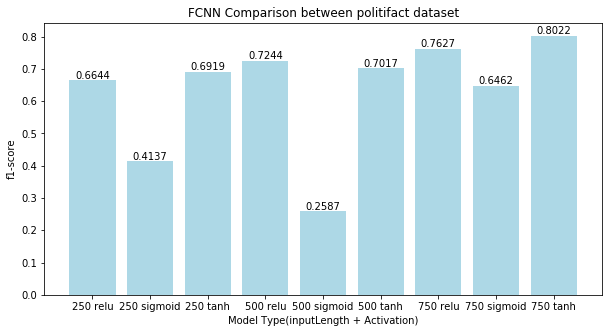

In [121]:
createPlot(0, 9, "FCNN Comparison between politifact dataset", "Model Type(inputLength + Activation)", 9, fcnnStats)

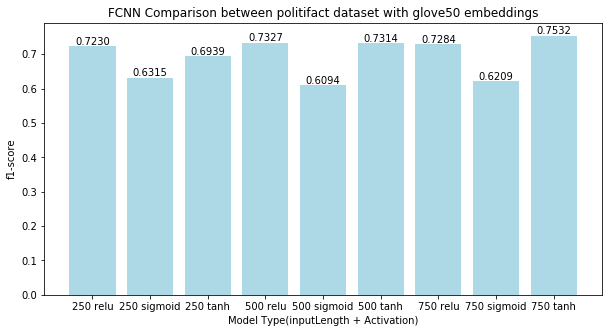

In [122]:
createPlot(9, 18, "FCNN Comparison between politifact dataset with glove50 embeddings", "Model Type(inputLength + Activation)", 9, fcnnStats)

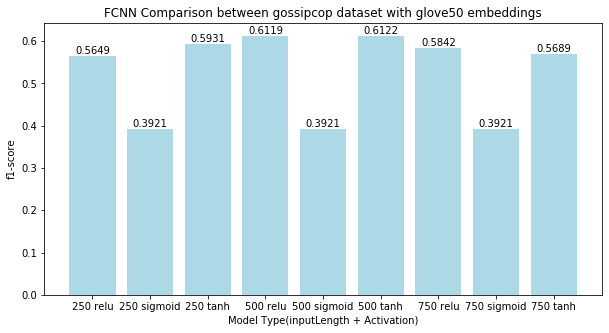

In [123]:
createPlot(18, 27, "FCNN Comparison between gossipcop dataset with glove50 embeddings", "Model Type(inputLength + Activation)", 9, fcnnStats)

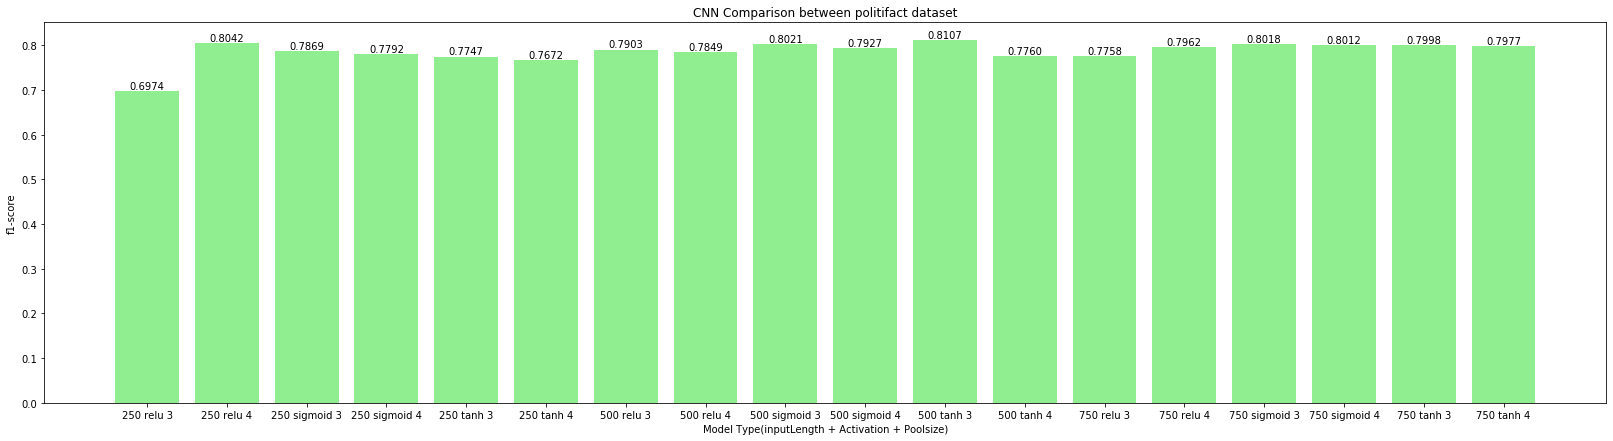

In [124]:
createPlotCnn(0, 18, "CNN Comparison between politifact dataset", "Model Type(inputLength + Activation + Poolsize)", 18, cnnStats)

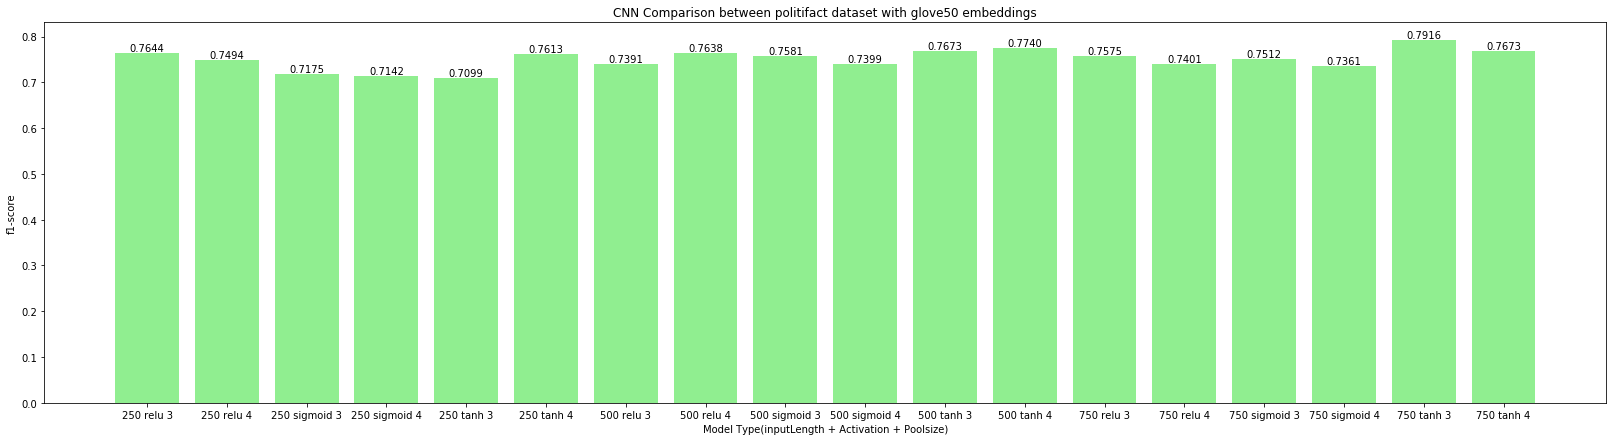

In [125]:
createPlotCnn(18, 36, "CNN Comparison between politifact dataset with glove50 embeddings", "Model Type(inputLength + Activation + Poolsize)", 18, cnnStats)

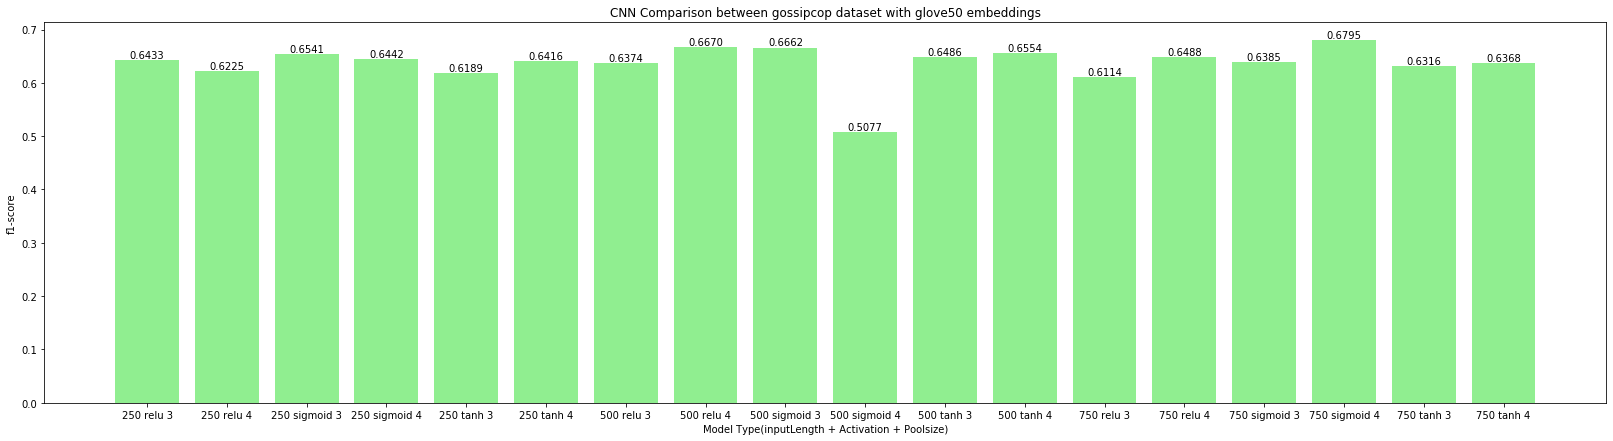

In [126]:
createPlotCnn(36, 54, "CNN Comparison between gossipcop dataset with glove50 embeddings", "Model Type(inputLength + Activation + Poolsize)", 18, cnnStats)

In [137]:
def createPlot(start, stop, title, xlabel, size, df):
    accuracy = [1]*size
    model = [1]*size
    count = 0;
    for x in range(start, stop):
        accuracy[count] = df['f1-score'][x]
        model[count] = str(df['inputlength'][x]) + " " + str(df['activation'][x])
        count+=1
        
    plt.rcParams['figure.figsize'] = (5, 5)

    plot = plt.bar(model, accuracy, color='lightblue')
    plt.xlabel(xlabel)
    plt.ylabel("f1-score")
    plt.title(title)

    for value in plot:
        height = value.get_height()
        plt.text(value.get_x() + value.get_width()/2.,
                 height,'%s' % str(height)[0:6], ha='center', va='bottom')
plt.show()

In [138]:
def createPlotCnn(start, stop, title, xlabel, size, df):
    accuracy = [1]*size
    model = [1]*size
    count = 0;
    for x in range(start, stop):
        accuracy[count] = df['f1-score'][x]
        model[count] = str(df['inputlength'][x]) + " " + str(df['activation'][x]) + " " + str(df['pool_size'][x])
        count+=1
        
    plt.rcParams['figure.figsize'] = (5, 5)

    plot = plt.bar(model, accuracy, color='lightgreen')
    plt.xlabel(xlabel)
    plt.ylabel("f1-score")
    plt.title(title)

    for value in plot:
        height = value.get_height()
        plt.text(value.get_x() + value.get_width()/2.,
                 height,'%s' % str(height)[0:6], ha='center', va='bottom')
plt.show()

In [139]:
politifactFcnn = fcnnStats[0:9]
politifactCnn = cnnStats[0:18]
politifactFcnn = politifactFcnn.sort_values(by=['f1-score']).tail(2)
politifactCnn = politifactCnn.sort_values(by=['f1-score']).tail(2)
politifactFcnn = politifactFcnn.reset_index(drop=True)
politifactCnn = politifactCnn.reset_index(drop=True)

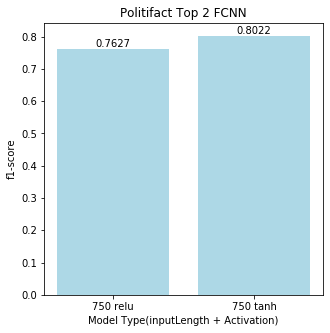

In [140]:
createPlot(0, 2, "Politifact Top 2 FCNN", "Model Type(inputLength + Activation)", 2, politifactFcnn)

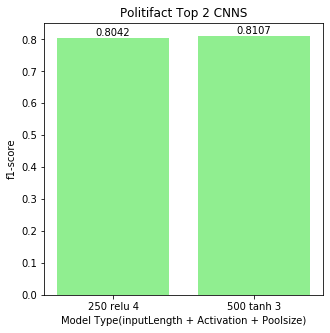

In [141]:
createPlotCnn(0, 2, "Politifact Top 2 CNNS", "Model Type(inputLength + Activation + Poolsize)", 2, politifactCnn)

In [142]:
politifactFcnn = fcnnStats[9:18]
politifactCnn = cnnStats[18:36]
politifactFcnn = politifactFcnn.sort_values(by=['f1-score']).tail(2)
politifactCnn = politifactCnn.sort_values(by=['f1-score']).tail(2)
politifactFcnn = politifactFcnn.reset_index(drop=True)
politifactCnn = politifactCnn.reset_index(drop=True)

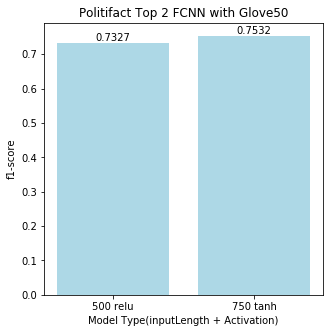

In [143]:
createPlot(0, 2, "Politifact Top 2 FCNN with Glove50", "Model Type(inputLength + Activation)", 2, politifactFcnn)

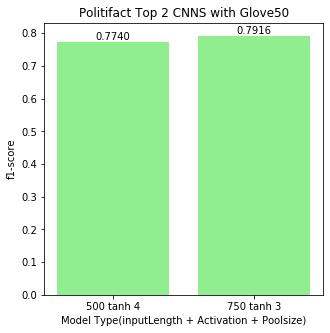

In [144]:
createPlotCnn(0, 2, "Politifact Top 2 CNNS with Glove50", "Model Type(inputLength + Activation + Poolsize)", 2, politifactCnn)

In [145]:
politifactFcnn = fcnnStats[18:27]
politifactCnn = cnnStats[36:54]
politifactFcnn = politifactFcnn.sort_values(by=['f1-score']).tail(2)
politifactCnn = politifactCnn.sort_values(by=['f1-score']).tail(2)
politifactFcnn = politifactFcnn.reset_index(drop=True)
politifactCnn = politifactCnn.reset_index(drop=True)

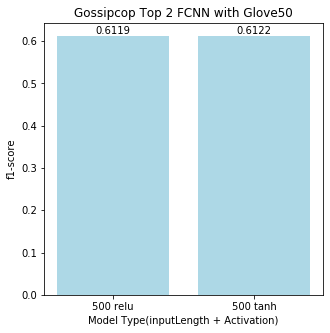

In [146]:
createPlot(0, 2, "Gossipcop Top 2 FCNN with Glove50", "Model Type(inputLength + Activation)", 2, politifactFcnn)

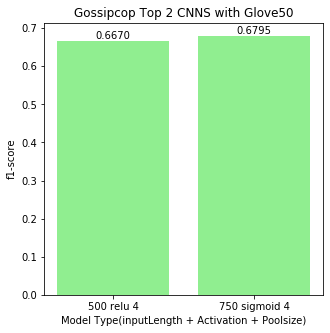

In [147]:
createPlotCnn(0, 2, "Gossipcop Top 2 CNNS with Glove50", "Model Type(inputLength + Activation + Poolsize)", 2, politifactCnn)